# The material presented in this notebook is for using in Introduction to Deep Learning ECE.685D course, Duke University, Fall 2020.

# Working with Data and Models in Pytorch

* ## A summary for a general learning procedure.
* ## Loading data:
    * ### Common datasets, access the data by the Pytorch build-in package torchvision, torchaudio and torchtext, and then load it by torch.utils.data.DataLoader;
    * ### Private datasets, access and load the data by adding new custom datasets. The dataset should inherit from the standard torch.utils.data.Dataset class, including "__getitem__" and "__len__".
* ## Saving and loading models:
    * ### save and load the entire model including the model architecture.
    * ### save and load trained parameters of the model.

## I. Training and Testing for supervised learning

### Training,
Train a model to fit given data, $\{(x_i, y_i)\}_{i=1}^n\to \text{Algorithm} \to f$.

    for epoch in range(total_epoch):

        for batch in range(trainloader):   
            ...
        
### Testing,
Evaluate how well the model match some new income data, $\mathcal{L}(f(x), y)$.

    for epoch in range(total_epoch):

        for batch in range(trainloader):   
            ...
        for batch in range(testloader):
            ...

After learning, we hope
1. The algorithm is able to train $f$ well, saying small training errors.
2. The trained model $f$ is able to match the pattern of new data well, saying small testing errors.

With small training error, hopefully the testing error will be small.

### Dataloader
Original data -> random shuffle -> queue of minibatches for iterative training.

## II. Loading Data
### 1. Custom the Dataloader
(1) Define the class of data inheriting from the standard torch.utils.data.Dataset class.

    a. download the online dataset or read the local dataset.
    
    b. define __getitem__, return index of items in the dataset.
    
    c. define __len__, return the size of the dataset.
(2) Pass it to torch.utils.data.DataLoader and get the dataloader of your private dataset.

### 2. Pytorch build-in packages, such as torchvision, torchtext, torchaudio

### An Example of datasets in torchvision, MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

All datasets are subclasses of torch.utils.data.Dataset, with name of the format torchvision.datasets."__Name of Dataset__"
* They have __getitem__ and __len__ methods implemented. 
* They can all be passed to a torch.utils.data.DataLoader
https://pytorch.org/docs/stable/torchvision/datasets.html

"__Name of Dataset__" includes many datasets such as MNIST, Fashion-MNIST, ImageNet, CIFAR10, SVHN, COCO, LSUN, and so on.

In [2]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform = transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

tensor([8, 6, 0, 5])


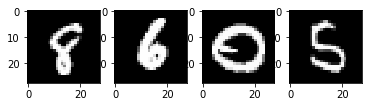

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
im = images[0:4]
fig , ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(im[i][0], cmap='gray')
print(labels[0:4])

Note that Transforms are common image transformations for data augmentation. 

* __transforms.CenterCrop__ :  Crops the given image at the center according to the given size. 
* __transforms.ColorJitter__ :  Randomly change the brightness, contrast and saturation of an image.
* __transforms.Grayscale__ : Convert image to grayscale.
* __transforms.Resize__ : Resize the input image to the given size.
* __transforms.Normalize(mean, std, inplace=False)__ : Normalize the image with mean and standard deviation. 


They can be chained together by transforms.Compose():

In [4]:
transforms.Compose([
    transforms.CenterCrop(10),
    transforms.ToTensor(),
])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

## III. Saving and Loading a Model

What we want to save and load?
1. The model parameters, including weights and biases.
2. The model architecture.

Three functions to be familiar with:
* torch.save(arg, PATH)
* torch.load(PATH)
* model.load_state_dict(arg)

What is state_dict?
model.state_dict() is simply a Python dictionary object that maps each layer to its parameter tensor.

### An example of a linear regression model

In [5]:
# Define model
class Linear_Reg(nn.Module):
    def __init__(self):
        super(Linear_Reg, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

# Initialize model
model = Linear_Reg()

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
linear.weight 	 torch.Size([1, 10])
linear.bias 	 torch.Size([1])


###  1- Save/Load state_dict 

In [6]:
PATH = './ckpt_state_dics.pth'
torch.save(model.state_dict(), PATH)   # Saving
model = Linear_Reg()
model.load_state_dict(torch.load(PATH))  # Loading
model.eval()

Linear_Reg(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s __state_dict__ with the __torch.save()__ function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

###  2- Save/Load Entire Model

In [7]:
PATH = './ckpt_entire.pth'
torch.save(model, PATH)

#Model class must be defined somewhere
model = torch.load(PATH)
model.eval()

/Users/wusuya/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear_Reg. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/wusuya/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Linear_Reg(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)